In [28]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

In [5]:
rna = pd.read_csv(f"{ct}.RNA_DEG.csv", index_col=0)
rna.head()

,stats,fdr,log2(old/young),DEG
gene,,,,
Xkr4,43.672122,2.106014e-09,0.054779,0
Gm1992,9.656087,1.843535e-02,-0.461790,0
Gm19938,25.863788,1.032846e-05,0.179678,0
Mrpl15,1.435565,5.860782e-01,0.021702,0
Lypla1,11.053947,9.864865e-03,0.114144,0


In [6]:
mcg = pd.read_csv(f"{ct}.aDMR_gene.csv", index_col=0)
mcg.head()

,start,end,dmr_id,2mo,9mo,18mo,gene_chr,gene_start,gene_end,gene_id,gene_strand,gene_name,gene_type,old-young
chr,,,,,,,,,,,,,,
chr1,5058817,5058849,chr1-5058817-5058849,0.65,0.60,0.90,chr1,4907576,5072285,ENSMUSG00000002459.13,-,Rgs20,protein_coding,0.25
chr1,12811482,12811725,chr1-12811482-12811725,0.36,0.52,0.56,chr1,12690277,12863192,ENSMUSG00000016918.11,+,Sulf1,protein_coding,0.20
chr1,12860419,12860477,chr1-12860419-12860477,0.43,0.59,0.64,chr1,12690277,12863192,ENSMUSG00000016918.11,+,Sulf1,protein_coding,0.21
chr1,14304934,14304939,chr1-14304934-14304939,0.68,0.62,0.47,chr1,14166954,14312235,ENSMUSG00000025932.10,-,Eya1,protein_coding,-0.21
chr1,14305208,14305213,chr1-14305208-14305213,0.61,0.37,0.45,chr1,14166954,14312235,ENSMUSG00000025932.10,-,Eya1,protein_coding,-0.16


In [8]:
# mcg groupby gene_name and get the mean value of old-young
dmr_mean = mcg.groupby('gene_name')['old-young'].mean()

In [29]:
toplot = pd.concat([dmr_mean, rna['log2(old/young)']], axis = 1).fillna(0)
toplot = toplot.loc[toplot.index.isin(rna[rna['DEG'] != 0].index)]

In [27]:
# use scipy to perform pearson correlation of old-young	log2(old/young)


pearsonr(toplot['old-young'], toplot['log2(old/young)'])


PearsonRResult(statistic=-0.19163993855633274, pvalue=2.159064662705798e-10)

Text(0.5, 1.0, 'Oligo_NN aDMR vs RNA')

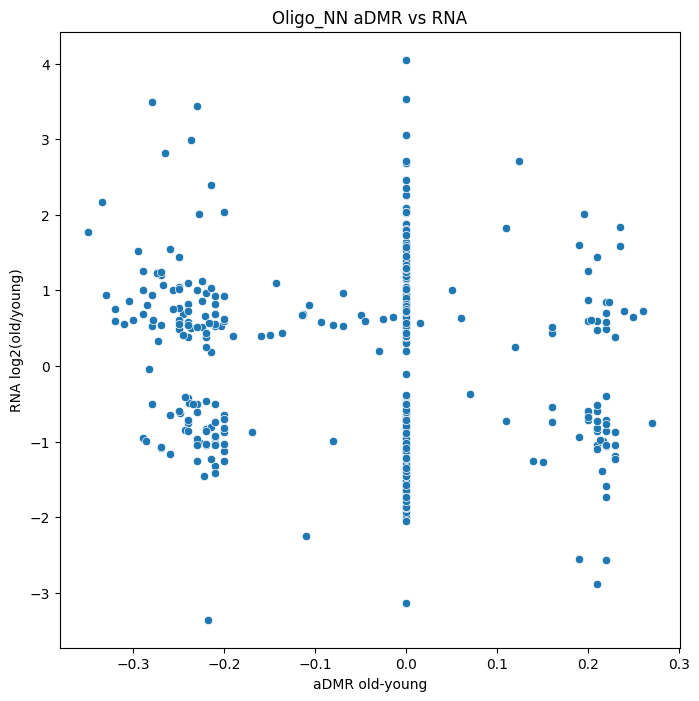

In [31]:
# scatterplot using toplot
plt.figure(figsize=(8, 8))
sns.scatterplot(data=toplot, x='old-young', y='log2(old/young)')
plt.xlabel('aDMR old-young')
plt.ylabel('RNA log2(old/young)')
plt.title(f"{ct} aDMR vs RNA")